In [1]:
# Main imports
import numpy as np
import pandas as pd

# Import matplotlib and such
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
plt.ion()

# Import function for drawing thermodynamic models
from helper_functions import thermodynamic_model

In [2]:
# Set global styles
textwidth=5.5
halfcolwidth=3
fontsize=8
titlesize=10
panel_label_size=12
legend_fontsize=7
markersize=5
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['text.usetex'] = False

# Used to create color gradient across data points of different P values
color_strong = np.array([.11, .69, .93])
color_weak = np.array([1.00, .94, .21])

# Conversion parameter
kbt_to_kcal = 1/1.62

In [3]:
# Used to annotate a regime of the expression manifold
def annotate_regime(x,y,n,color):
    ax.plot(x,y,'o',
            markersize=10,
            markeredgecolor=color,
            markerfacecolor='white',
            markeredgewidth=.5)
    ax.text(x,y,'%d'%n,
            color=color,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=8,
            fontweight='regular')

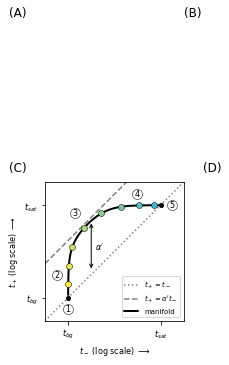

In [4]:
### Figure 3: stabilization theory ###

# Create figure
fig, _ = plt.subplots(figsize=[textwidth,5])

# Specify axes
gs = gridspec.GridSpec(1, 1, top=.50, bottom=.10, left=.10, right=.45)
ax = plt.subplot(gs[0,0])

# P values for continuous curve
Ps = np.logspace(-7,1,100)

# P values for dots
Pdots = np.logspace(-6,0,8)

# Parameters for thermodynamic model
t_sat=1
alpha=300
F=100
beta=1
t_bg=1E-4
lim = np.array([1E-5,1E1])

# Compute coordinates of expression manifold
xs = thermodynamic_model(t_sat=t_sat, P=Ps, F=0, alpha=alpha, beta=beta, t_bg=t_bg)
ys = thermodynamic_model(t_sat=t_sat, P=Ps, F=F, alpha=alpha, beta=beta, t_bg=t_bg)

# Compute alpha' and beta'
alpha_prime = (1+alpha*F)/(1+F)
beta_prime = (1+alpha*beta*F)/(1+alpha*F)

# Plot diagonal
ax.loglog(lim,lim,':', color='k', alpha=.5, label='$t_+ = t_-$')

# Plot maximal activation line
ax.loglog(lim,alpha_prime*lim,'--',color='k', alpha=.5, label='$t_+ = \\alpha\' t_-$')

# Plot expression manifold and enpoints
ax.loglog(xs,ys, linewidth=2, solid_capstyle='round', color='k', label='manifold')
ax.loglog(t_sat,beta_prime*t_sat,markersize=4,marker='o',color='k')
ax.loglog(t_bg,t_bg,markersize=4,marker='o',color='k')

# Plot dots along expression manifold
xdots = thermodynamic_model(t_sat=t_sat, P=Pdots, F=0, alpha=alpha, beta=beta, t_bg=t_bg)
ydots = thermodynamic_model(t_sat=t_sat, P=Pdots, F=F, alpha=alpha, beta=beta, t_bg=t_bg)
for i, P in enumerate(Pdots):
    
    # Define color of data point
    f = 1 - i/len(Pdots-1)
    color = f*np.array(color_weak) + (1-f)*np.array(color_strong)
    
    # Plot data point with specified color
    ax.loglog(xdots[i], ydots[i], marker='o', color=color, alpha=1, markersize=6, 
              markeredgewidth=.5, markeredgecolor='k')

# Annotate regimes of expression manifold
t_mid = np.sqrt(t_bg*t_sat)
annotate_regime(t_bg,t_bg/3,n=1,color='k')
annotate_regime(t_bg/3,t_bg*10,n=2,color='k')
annotate_regime(t_mid*2E-2,alpha_prime*t_mid*1.5E-1,n=3,color='k')
annotate_regime(t_sat/10,t_sat*3,n=4,color='k')
annotate_regime(t_sat*3,t_sat,n=5,color='k')

# Annotate maximal activation level
arrow_x = 1E-3
arrow_ylo = arrow_x*1.5
arrow_yhi = arrow_x*alpha_prime/1.5
arrow_ymid = np.sqrt(arrow_ylo*arrow_yhi)
ax.annotate('',
            xy=(arrow_x, arrow_ylo), 
            xytext=(arrow_x, arrow_yhi),
            arrowprops={'arrowstyle':'<->'})
ax.text(arrow_x*1.5, arrow_ymid, "$\\alpha'$", horizontalalignment='left', verticalalignment='center')

# Style x-axis
ax.set_xticks([t_bg, t_sat])
ax.set_xticklabels(['$t_{bg}$', '$t_{sat}$'])
ax.set_xlabel("$t_-$ (log scale) $\\longrightarrow$")
ax.get_xaxis().set_tick_params(which='minor', size=0) 

# Style y-axis
ax.set_yticks([t_bg, t_sat])
ax.set_yticklabels(['$t_{bg}$', '$t_{sat}$'])
ax.set_ylabel("$t_+$ (log scale) $\\longrightarrow$")
ax.get_yaxis().set_tick_params(which='minor', size=0)

# Set limits and aspect
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(fontsize=legend_fontsize)

# Label panels
plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.45,.98,'(B)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.01,.55,'(C)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.50,.55,'(D)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')

# Save figure
fig.savefig('../figures/plt_recruitment_theory.pdf', transparent=True)